# Рубежный контроль №2 по ТМО
## Вариант 12
Кузнецов Григорий ИУ5-63Б

Метод №1 - Дерево решений

Метод №2 - Случайный лес

Датасет - https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset (файл dc-wikia-data.csv)

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [104]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

In [105]:
# Чтение датасета
data = pd.read_csv("dc-wikia-data.csv")
data.shape

(6896, 13)

In [106]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [107]:
# Признаки
X_columns = ['ID', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES', 'YEAR']
# Целевой признак
Y_column = ['ALIGN']

# В таблице присутствуют пропущенные значения, пропустим строки содержащие таковые
data.dropna(inplace = True, subset=X_columns + Y_column)
data.shape

(2097, 13)

In [108]:
# Кодирование категориальных признаков
data_t = pd.get_dummies(data[X_columns])
enc = LabelEncoder()
data_t.insert(0, Y_column[0], enc.fit_transform(data[Y_column].values.ravel()).transpose())
data_t.head()

,ALIGN,APPEARANCES,YEAR,ID_Identity Unknown,ID_Public Identity,ID_Secret Identity,EYE_Amber Eyes,EYE_Black Eyes,EYE_Blue Eyes,EYE_Brown Eyes,...,HAIR_Red Hair,HAIR_Reddish Brown Hair,HAIR_Strawberry Blond Hair,HAIR_Violet Hair,HAIR_White Hair,SEX_Female Characters,SEX_Genderless Characters,SEX_Male Characters,ALIVE_Deceased Characters,ALIVE_Living Characters
0,1,3093.0,1939.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,1,2496.0,1986.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,1,1565.0,1959.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,1,1316.0,1987.0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,1,1237.0,1940.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [109]:
t_X_columns = [col for col in data_t.columns for x in X_columns if col.startswith(x)]

# Разбиение на тестовую и обучающие выборки
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_t[t_X_columns], data_t[Y_column],
    test_size=0.2, random_state=1)

Для оценки качества моделей будем использовать метрику точности и матрицу ошибок. Метрика точности покажет общую точность модели, а матрица ошибок покажет точность по каждому классу.

In [110]:
# Обучение модели дерева решений
dtc = DecisionTreeClassifier(max_depth=7, random_state=1)
dtc.fit(data_X_train, data_y_train)

# Метрика точности
accuracy_score(data_y_test, dtc.predict(data_X_test))

0.5642857142857143

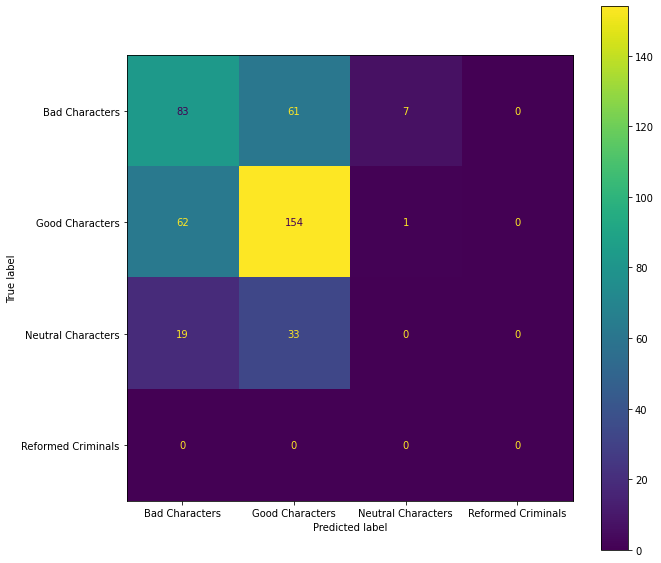

In [111]:
# Матрица ошибок
fig, ax = plt.subplots(figsize=(10, 10))
mtx = ConfusionMatrixDisplay.from_estimator(dtc, data_X_test, data_y_test, display_labels=enc.classes_, ax=ax, labels=range(0, 4))

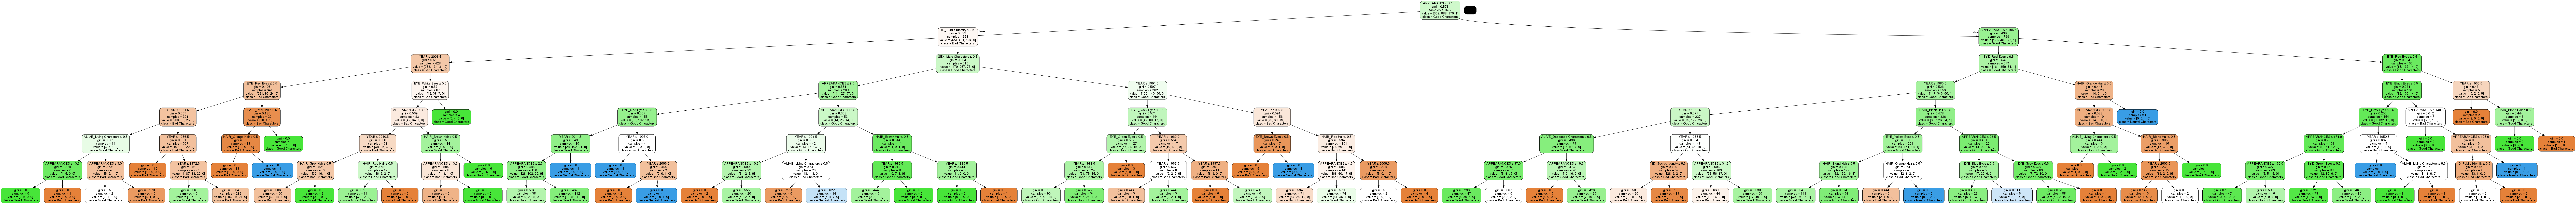

In [112]:
def get_png_tree(tree_model_param, feature_names_param, class_names):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True, class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

# Визуализация дерева
Image(get_png_tree(dtc, data_t[t_X_columns].columns, enc.classes_), height='70%')

In [113]:
# Случайный лес
rfc = RandomForestClassifier(max_depth = 7, random_state=1)
rfc.fit(data_X_train, data_y_train)

accuracy_score(data_y_test, rfc.predict(data_X_test))

C:\Users\Zid\AppData\Local\Temp\ipykernel_13152\1202796648.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(data_X_train, data_y_train)


0.5904761904761905

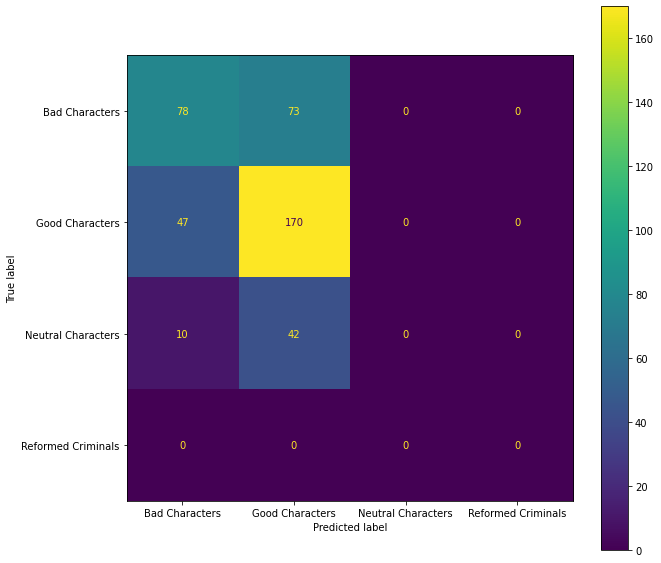

In [114]:
# Матрица ошибок
fig, ax = plt.subplots(figsize=(10, 10))
mtx = ConfusionMatrixDisplay.from_estimator(rfc, data_X_test, data_y_test, display_labels=enc.classes_, ax=ax, labels=range(0, 4))

## Сравнение качества моделей

In [115]:
print("Точность дерева решений: {0}\nТочность случайного леса: {1}".format(
    accuracy_score(data_y_test, dtc.predict(data_X_test)), accuracy_score(data_y_test, rfc.predict(data_X_test))))

Точность дерева решений: 0.5642857142857143
Точность случайного леса: 0.5904761904761905


Общая точность модели случайного леса больше чем точность дерева решений. Однако обе модели не могут корректно определить принадлежность объекту клссу 'Neutral Characters'.

Класс 'Bad Characters' определяется примерно с одинаковой точностью, а класс 'Good Characters' определяется лучше в модели случайного леса.